## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


import seaborn as sns
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
study_results.Timepoint.unique()


array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [4]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
mouse_metadata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [6]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [8]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_df.groupby(["Mouse ID", "Timepoint"]).size()
dupes = dupes.reset_index()
dupes.columns = ["Mouse ID", "Timepoint", "Count"]
dupes.head()

,Mouse ID,Timepoint,Count
0,a203,0,1
1,a203,5,1
2,a203,10,1
3,a203,15,1
4,a203,20,1


In [10]:
dupes.sort_values(by="Count", ascending=False).head(10)

,Mouse ID,Timepoint,Count
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
0,a203,0,1
1264,q633,0,1
1260,q610,20,1
1261,q610,25,1
1262,q610,30,1


In [11]:
# combine the two columns into a single key 
mouse_df2 = mouse_df.copy()
mouse_df2["Key"] = mouse_df2["Mouse ID"] + "_" + mouse_df2["Timepoint"].astype(str)
mouse_df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Key
0,b128,0,45.0,0,Capomulin,Female,9,22,b128_0
1,f932,0,45.0,0,Ketapril,Male,15,29,f932_0
2,g107,0,45.0,0,Ketapril,Female,2,29,g107_0
3,a457,0,45.0,0,Ketapril,Female,11,30,a457_0
4,c819,0,45.0,0,Ketapril,Male,21,25,c819_0


In [12]:
mouse_df2.Key.value_counts().head(10)

g989_20    2
g989_15    2
g989_0     2
g989_10    2
g989_5     2
t198_10    1
b128_15    1
y260_45    1
a492_45    1
i901_30    1
Name: Key, dtype: int64

In [13]:
# # # Optional: Get all the data for the duplicate mouse ID. 
mask = mouse_df["Mouse ID"] == "g989"
mouse_df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_df["Mouse ID"] != "g989"
cleanmouse_df = mouse_df.loc[mask].reset_index(drop=True)
cleanmouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice in the clean DataFrame.
cleanmouse_df["Mouse ID"].nunique()

248

In [16]:
cleanmouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = cleanmouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_med = cleanmouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_var = cleanmouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std = cleanmouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = cleanmouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame([drug_mean, drug_med, drug_var, drug_std, drug_sem]).T
summary_df.columns = ["Tumor_Mean", "Tumor_Median", "Tumor_Var", "Tumor_STD", "Tumor_SEM"]
summary_df

,Tumor_Mean,Tumor_Median,Tumor_Var,Tumor_STD,Tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line

cleanmouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [19]:
# # Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#plt.figure (figsize=(10,6))
# #cleanmouse_df.plot.bar(x="Mouse ID" , y=None)
# cleanmouse_df.plot.bar(x="Mouse ID", y=None, rot=0, title='Unique mice Tested Per Drug')

# #DataFrame.plot.bar(x=None, y=None, **kwargs)

# cleanmouse_df['Mouse_ID'].plot(kind='bar', legend=none)
# mouse_plot.set_xlabel("Mouse ID")
# mouse_plot.set_ylabel("Drug Regimen")

In [20]:
mouse_df['Drug Regimen'].value_counts(ascending=True)

Propriva     161
Infubinol    178
Ceftamin     178
Placebo      181
Stelasyn     181
Zoniferol    182
Naftisol     186
Ketapril     188
Ramicane     228
Capomulin    230
Name: Drug Regimen, dtype: int64

In [21]:
# drug_merge = pd.merge(cleanmouse_df, summary_df, how="left", on="Drug Regimen")
# drug_merge.head()

In [22]:
# # # Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# plt.figure (figsize=(10,6))
# drug_merge.plot.bar(x="Mouse ID", y=None, rot=0, title='Unique mice Tested Per Drug')

# # cleanmouse_df['Drug Regimen'].plot(kind='bar', legend=True)
# # mouse_plot.set_xlabel("Mouse ID")
# # mouse_plot.set_ylabel("Drug Regimen")

In [23]:
cleanmouse_df.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index()

,Drug Regimen,Mouse ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


In [24]:
drugplot = cleanmouse_df.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index()
drugplot.rename(columns={"Mouse ID": "Total_Mouse_Count"}, inplace=True)
drugplot

,Drug Regimen,Total_Mouse_Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


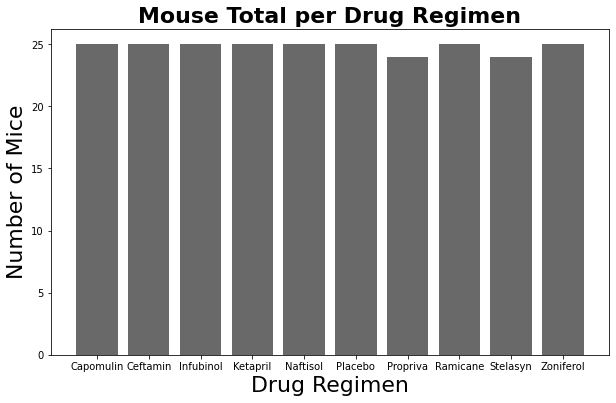

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(drugplot["Drug Regimen"], drugplot.Total_Mouse_Count, color="dimgrey")
plt.title("Mouse Total per Drug Regimen", fontsize=22, fontweight="bold")
plt.xlabel("Drug Regimen", fontsize=22)
plt.ylabel("Number of Mice", fontsize=22)
plt.show()

In [26]:


# Generate a pie plot showing the distribution of female versus male mice using pandas

In [27]:
gender_count = cleanmouse_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

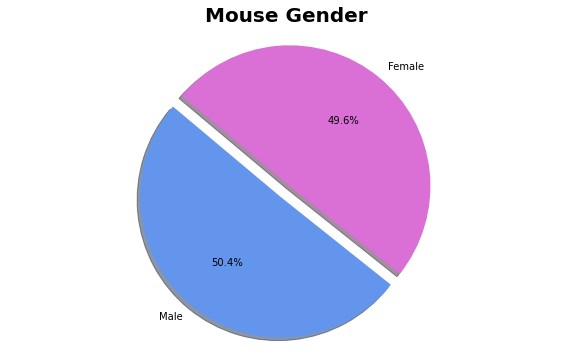

In [28]:


# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = gender_count.Sex.value_counts().index
count = gender_count.Sex.value_counts().values
colors = ["cornflowerblue", "orchid"]
explode = (0, 0.1)

plt.figure(figsize=(10,6))
plt.pie(count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Mouse Gender", fontsize=20, fontweight="bold")
plt.show()

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender2 = cleanmouse_df.Sex.value_counts()
plt.pie(count.values,labels=count.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Mouse Gender", fontsize=20, fontweight="bold")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [30]:
final_tumorv = cleanmouse_df.groupby(["Mouse ID", "Drug Regimen"]).Timepoint.max().reset_index()
final_tumorv2 = pd.merge(final_tumorv, cleanmouse_df, on=["Mouse ID", "Drug Regimen", "Timepoint"], how="left")
final_tumorv2


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,48.710661,0,Female,12,26
244,z578,Ramicane,45,30.638696,0,Male,11,16
245,z581,Infubinol,45,62.754451,3,Female,24,25
246,z795,Naftisol,45,65.741070,3,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [31]:
mask1 = [True if x in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] else False for x in final_tumorv2['Drug Regimen']]
final_tumorv3 = final_tumorv2.loc[mask].reset_index(drop=True)
final_tumorv3.head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29
5,a401,Zoniferol,45,66.794156,4,Female,8,25
6,a411,Ramicane,45,38.407618,1,Male,3,22
7,a444,Ramicane,45,43.047543,0,Female,10,25
8,a457,Ketapril,10,49.783419,0,Female,11,30
9,a492,Stelasyn,45,60.122011,1,Male,20,25


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumorv4 = cleanmouse_df.groupby(["Mouse ID"])['Timepoint'].max()
final_tumorv4 = final_tumorv3.reset_index()
final_tumorv4.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
 # Put treatments into a list for for loop (and later for plot labels)
# treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# treatment_merge = final_tumorv3.merge(cleanmouse_df,on=['Mouse ID','Timepoint'],how="left")
# treatment_merge.head(10)

,index,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,0,a203,Infubinol,45,67.973419,2,Female,20,23
1,1,a251,Infubinol,45,65.525743,1,Female,21,25
2,2,a262,Placebo,45,70.717621,4,Female,17,29
3,3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,4,a366,Stelasyn,30,63.440686,1,Female,16,29


In [36]:
 # Put treatments into a list for for loop (and later for plot labels)
treatments2 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
vol_tumorlist = []

# # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments2:
    final_tumorv5 = final_tumorv4.loc[final_tumorv4["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
     
# add subset 
    vol_tumorlist.append(final_tumorv5)
    
# Determine outliers using upper and lower bounds
    quartiles = final_tumorv4.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumorv5.loc[(final_tumorv5 < lower_bound) | (final_tumorv5 > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

KeyError: 0.25

ValueError: Dimensions of labels and X must be compatible

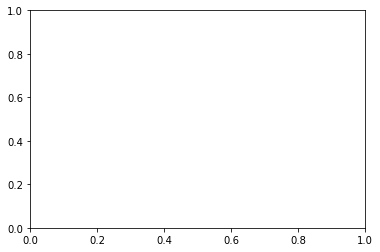

In [42]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor='firebrickred',markersize=12)
plt.boxplot(vol_tumorlist, labels = vol_tumorlist,flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Treatments Box Plot", fontsize=20, fontweight="bold")
plt.show()


In [43]:
final_tumorv3.loc[(final_tumorv3["Drug Regimen"] == "Infubinol")]

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
11,a577,Infubinol,30,57.031862,2,Female,6,25
13,a685,Infubinol,45,66.083066,3,Male,8,30
27,c139,Infubinol,45,72.226731,2,Male,11,28
31,c326,Infubinol,5,36.321346,0,Female,18,25
41,c895,Infubinol,30,60.969711,2,Female,7,29
50,e476,Infubinol,45,62.435404,1,Male,23,26
56,f345,Infubinol,45,60.918767,1,Male,23,26
78,i386,Infubinol,40,67.289621,4,Female,23,29


32.37735684
40.1592203
31.56046955
40.65900627
54.04860769
65.52574285
48.4877288375
64.38360974


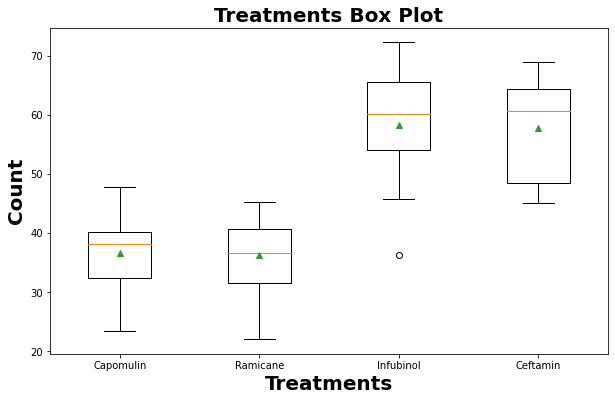

In [44]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

total_data = []

for drug in treatments:
    treatment_data = final_tumorv3.loc[final_tumorv3["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    total_data.append(treatment_data)
    print(np.quantile(treatment_data, .25))
    print(np.quantile(treatment_data, .75))


plt.figure(figsize= (10,6))
plt.boxplot(total_data, showmeans=True, labels=treatments)
plt.ylabel('Count', fontsize=20, fontweight="bold")
plt.xlabel("Treatments", fontsize=20, fontweight="bold")
plt.title("Treatments Box Plot", fontsize=20, fontweight="bold")
plt.show()

## Line and Scatter Plots

In [ ]:
cleanmouse_df.head()

In [47]:
# cleanmouse_df.groupby(["Timepoint", "Tumor Volume (mm3)"]).size()
# tumor_vol = cleanmouse_df.reset_index()
# tumor_vol.columns = ["Timepoint", "Tumor Volume (mm3)"]
# tumor_vol.head()

# dupes = mouse_df.groupby(["Mouse ID", "Timepoint"]).size()
# dupes = dupes.reset_index()
# dupes.columns = ["Mouse ID", "Timepoint", "Count"]
# dupes.head()

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleanmouse_df.loc[cleanmouse_df['Drug Regimen'] == "Capomulin"]

mouse_treatment = capomulin_data.loc[capomulin_data['Mouse ID']== 'l509']
mouse_treatment.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,l509,0,45.000000,0,Capomulin,Male,17,21
251,l509,5,45.851193,0,Capomulin,Male,17,21
535,l509,10,46.759074,0,Capomulin,Male,17,21
873,l509,15,47.488599,1,Capomulin,Male,17,21
973,l509,20,48.070452,2,Capomulin,Male,17,21


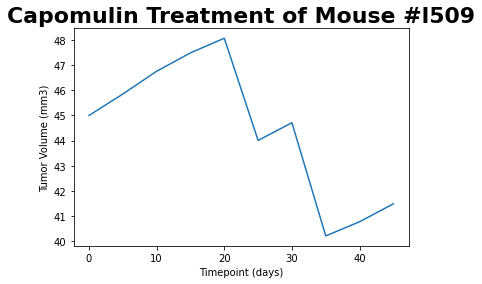

In [56]:
plt.plot(mouse_treatment['Timepoint'],mouse_treatment['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse #l509', fontsize=22, fontweight="bold")
plt.show()


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# x_axis = "Timepoint"
# e_x = "Tumor Volume (mm3)"
# plt.plot(x_axis, e_x)
# plt.show()

# plt.plot(x_axis, e_x)
# # Show the graph that we have created
# plt.show()


#  # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# capomulin_table = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
# capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
# plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
# plt.show()

# plt.title("Mouse Total per Drug Regimen", fontsize=22, fontweight="bold")

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleanmouse_df.loc[cleanmouse_df['Drug Regimen'] == "Capomulin"]
capomulin_dataavg = capomulin_data.groupby(['Mouse ID']).mean()
capomulin_dataavg.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


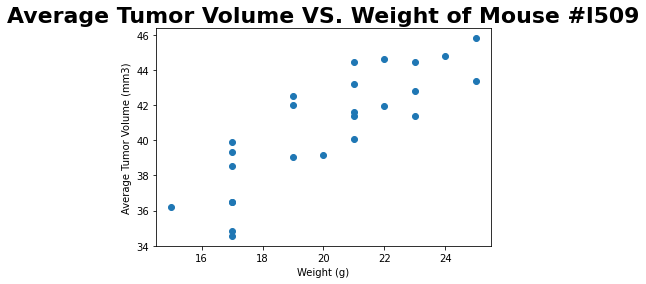

In [60]:
plt.scatter(capomulin_dataavg['Weight (g)'],capomulin_dataavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume VS. Weight of Mouse #l509', fontsize=22, fontweight="bold")
plt.show()

In [61]:
# # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# plt.scatter(treatments, final_tumorv3, marker="o", facecolors="red", edgecolors="black",
#             s=treatments, alpha=0.75)





## Correlation and Regression

In [64]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


corr=round(st.pearsonr(capomulin_dataavg['Weight (g)'],capomulin_dataavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_dataavg['Weight (g)'],capomulin_dataavg['Tumor Volume (mm3)'])



The correlation between mouse weight and the average tumor volume is 0.84


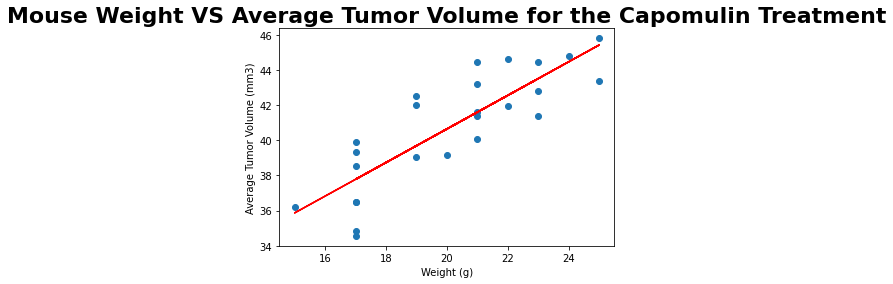

In [66]:
y_values = capomulin_dataavg['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_dataavg['Weight (g)'],capomulin_dataavg['Tumor Volume (mm3)'])
plt.plot(capomulin_dataavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight VS Average Tumor Volume for the Capomulin Treatment", fontsize=22, fontweight="bold")
plt.show()




In [ ]:
# plt.scatter(final_tumorv3.iloc[:,1],final_tumorv3.iloc[:,8])
# plt.xlabel('Mouse Weight')
# plt.ylabel('Average Tumor Volume')
# plt.show()